<img src='../img/joint_school_banner_2.png' alt='joint school banner' align='right' width='100%'></img>

<br>

# ESA Climate Change Initiative - Limb Ozone Monthly Zonal Mean Profiles - Level 3

### About

This notebook provides an introduction to the [ESA CCI Ozone data](https://catalogue.ceda.ac.uk/uuid/ccbeb356a88847058159049678fe5c35) and shows you how the variable `Limb Ozone Monthly Zonal Mean (MZM) Profiles` can be used to monitor air quality. The full name of this dataset is `ESA Ozone Climate Change Initiative (Ozone CCI): ACE Level 3 Limb Ozone Monthly Zonal Mean (MZM) Profiles, Version 1`.

This dataset comprises gridded limb ozone monthly zonal mean profiles from the ACE FTS instrument on the SCISAT satellite. The data are zonal mean time series (10° latitude bin) and include uncertainty/variability of the Monthly Zonal Mean. The monthly zonal mean (MZM) data set provides ozone profiles averaged in 10° latitude zones from 90°S to 90°N, for each month.

### Basic Facts

> **Spatial resolution**: `10° latitude bin profiles` <br>
> **Spatial coverage**: `Global` <br>
> **Temporal resolution**:  `Monthly` <br>
> **Temporal coverage**: `2003 to 2010` <br>
> **Data format**: `NetCDF`


### How to access the data

ESA CCI column-averaged methane data are available for download in the following ways:

* `manually` via the [CEDA Archive](https://data.ceda.ac.uk/neodc/esacci/ozone/data/limb_profiles/l3/ace_fts_scisat/monthly_zonal_mean/v0001). 
* `via FTP` using this [download URL](ftp://ftp.ceda.ac.uk/neodc/esacci/ozone/data/limb_profiles/l3/ace_fts_scisat/monthly_zonal_mean/v0001). You can use an FTP client such as [FileZilla](https://filezilla-project.org/) to access the files. 
* `programmatically` with a Python package called wget using the following code snippet ` wget -e robots=off --mirror --no-parent -r https://dap.ceda.ac.uk/neodc/esacci/ozone/data/limb_profiles/l3/ace_fts_scisat/monthly_zonal_mean/v0001/`

### Module outline
* [1 - Load ESA CCI Ozone Level 3 data from March 2004 to September 2010](#level3_esa_cci)
* [2 - Create (longterm) spatial mean of ozone mixing ratio](#longterm_mean)
* [3 - Visualize (longterm) ozone mixing ratio ](#visualize_ozone)

<hr>

#### Load required libraries

In [1]:
import os

import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='region_list'></a>Define a list with dictionaries holding bounding boxes for different regions

You can define several regions as a dictionary, e.g. the bounding box information for a `Global average`, `Southern Hemisphere` and `Northern Hemisphere`. The dictionaries are stored in a list.

In [3]:
# Global extent
global_extent={'name': 'global_extent',
            'lonmin':-180.0,
            'lonmax':180.0,
            'latmin':-90.0,
            'latmax':90.0}

# Southern Hemisphere extent
sh_extent={'name': 'sh_extent',
            'lonmin':-180.0,
            'lonmax':180.0,
            'latmin':-90.0,
            'latmax':0}

# Northern Hemisphere extent
nh_extent={'name': 'nh_extent',
            'lonmin':-180.0,
            'lonmax':180.0,
            'latmin':0,
            'latmax':90.0}

region_list=[global_extent,
             sh_extent,
             nh_extent]

## <a id='level3_esa_cci'></a>Load ESA CCI Ozone Level 3 data from March 2004 to September 2010

ESA CCI Limb Ozone MZM Profiles are available from March 2004 to September 2010. From this longterm time-series, you can create a spatial average of a specific region and visualize the monthly ozone mixing ratio content over time.

#### Load the ESA CCI Ozone Level 3 data files as `xarray.DataArray` with the function `xarray.open_mfdataset()`

The ESA CCI Ozone Level 3 data are disseminated in `netCDF`. The function `xarray.open_mfdataset()` can be used to load the data for all months at once. Use `time` for the keyword argument `concat_dim`.

In [4]:
esa_cci_o3 = xr.open_mfdataset('../../eodata/training_school/esa-cci/level3/o3/*.nc', concat_dim='time', combine='nested')
esa_cci_o3

<xarray.Dataset>
Dimensions:                     (air_pressure: 53, latitude_centers: 18, time: 79)
Coordinates:
  * air_pressure                (air_pressure) float32 450.0 400.0 ... 0.0002
  * latitude_centers            (latitude_centers) float32 -85.0 -75.0 ... 85.0
  * time                        (time) datetime64[ns] 2004-03-16 ... 2010-09-16
Data variables:
    approximate_altitude        (time, air_pressure) float32 dask.array<chunksize=(10, 53), meta=np.ndarray>
    ozone_mixing_ratio          (time, air_pressure, latitude_centers) float64 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    ozone_mole_concentation     (time, air_pressure, latitude_centers) float64 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    standard_error_of_the_mean  (time, air_pressure, latitude_centers) float32 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    sample_standard_deviation   (time, air_pressure, latitude_centers) float32 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    mean_uncertainty_estimate   (time, air_pressure, latitude_centers) float32 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    inhomogeneity_in_time       (time, air_pressure, latitude_centers) float32 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
    inhomogeneity_in_latitude   (time, air_pressure, latitude_centers) float32 dask.array<chunksize=(10, 53, 18), meta=np.ndarray>
Attributes: (12/23)
    title:                      ESA CCI ozone  monthly zonal mean data from i...
    summary:                    Monthly zonal mean ozone profiles in 10-deg l...
    comment:                    Definitions of parameters and data processing...
    sensor:                     ACE-FTS
    platform:                   SCISAT
    year:                       2004
    ...                         ...
    naming_authority:           FMI - Finnish Meteorological Institute
    Conventions:                CF-1.5
    standard_name_vocabulary:   NetCDF Climate and Forecast(CF) Metadata Conv...
    license:                    ozone_cci guidelines
    restriction:                Restricted under the use of ozone cci guidelines
    file_version:               fv0001

You see that the loaded data object contains 3 dimensions:
  * `air_pressure` 
  * `latitude_centers`
  * `time`


The data variable we are most interested in is the `ozone_mixing_ratio`.

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `ozone_mixing_ratio` is the mole fraction of ozone in the air, has the unit `1`, and has three dimensions, `air_pressure`, `latitude_centers` and `time` respectively.

In [5]:
o3 = esa_cci_o3['ozone_mixing_ratio']
o3

<xarray.DataArray 'ozone_mixing_ratio' (time: 79, air_pressure: 53, latitude_centers: 18)>
dask.array<concatenate, shape=(79, 53, 18), dtype=float64, chunksize=(12, 53, 18), chunktype=numpy.ndarray>
Coordinates:
  * air_pressure      (air_pressure) float32 450.0 400.0 350.0 ... 0.0003 0.0002
  * latitude_centers  (latitude_centers) float32 -85.0 -75.0 -65.0 ... 75.0 85.0
  * time              (time) datetime64[ns] 2004-03-16 2004-04-16 ... 2010-09-16
Attributes:
    units:          1
    standard_name:  mole_fraction_of_ozone_in_air

## <a id='longterm_mean'></a> Create (longterm) spatial mean of ozone mixing ratio

Let us loop through the list of regions and create a dictionary containing these lists:
- **o3_l3**: the spatial average for each month of ozone mixing ratio of the specific region, and
- **o3_monthly_avg**: the longterm mean of ozone mixing ratio of each month
- **o3_yearly_avg**: the annual mean of ozone mixing ratio for each year


The spatial average of a `xarray.DataArray` is computed with the function `xarray.DataArray.mean()` and specifying the dimension to apply the spatial average with `dim=["latitude_centers","air_pressure"]`.

The longterm average is retrieved by using xarray's `groupby('time.month').mean()` aggregator.

In [6]:
# Initialise an empty dictionary
o3_l3_dict = {}

# Loop through each item in region list
for region in region_list:
    print(region)
    # Generate a geographical subset
    tmp = o3.where((o3.latitude_centers < region['latmax']) & (o3.latitude_centers > region['latmin']), drop=True)

    # Create the spatial average of the region
    tmp_mean = tmp.mean(dim=["latitude_centers","air_pressure"])
    # Create the longterm climatology of each month
    tmp_climatology_mean = tmp_mean.groupby('time.month').mean()
    # Create the annual average of each year
    tmp_annual_mean = tmp_mean.groupby('time.year').mean()
    # Fill the dictionary with the lists
    o3_l3_dict[region['name']]={'o3_l3':tmp_mean,
                                'o3_monthly_avg': tmp_climatology_mean,
                                'o3_yearly_avg': tmp_annual_mean}


{'name': 'global_extent', 'lonmin': -180.0, 'lonmax': 180.0, 'latmin': -90.0, 'latmax': 90.0}
{'name': 'sh_extent', 'lonmin': -180.0, 'lonmax': 180.0, 'latmin': -90.0, 'latmax': 0}
{'name': 'nh_extent', 'lonmin': -180.0, 'lonmax': 180.0, 'latmin': 0, 'latmax': 90.0}


## <a id='visualize_ozone'></a>Visualize (longterm) ozone mixing ratio 

### <a id='plot_level3_ts'></a>Plot ozone mixing ratio time-series (2004 to 2010) for a Global average, Southern Hemisphere and Northern Hemisphere.

Let us visualize the ozone mixing ratio time-series from 2004 to 2010. You can make use of the `xarray.DataArray.plot.line()` function. As dictionary key, you select for each region the `o3_l3` time-series.

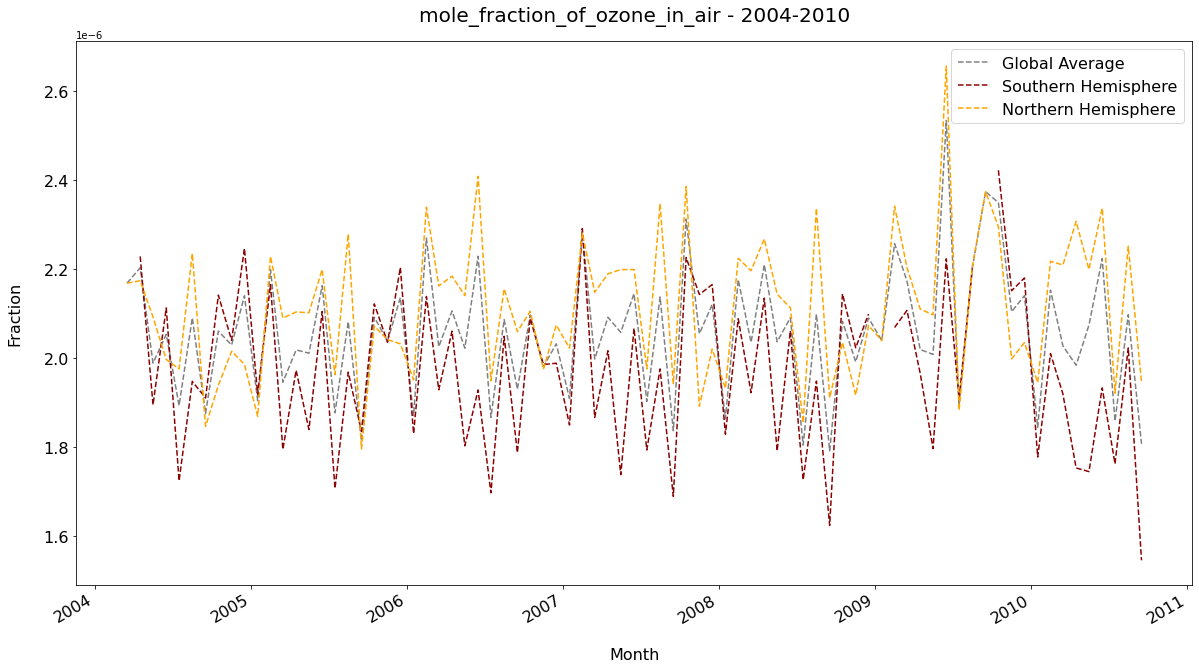

In [7]:
fig = plt.figure(figsize=(20,10))

(o3_l3_dict['global_extent']['o3_l3']).plot.line(
    linestyle='dashed',
    color='grey', 
    label='Global Average')

(o3_l3_dict['sh_extent']['o3_l3']).plot.line(
    linestyle='dashed',
    color='darkred', 
    label='Southern Hemisphere')

(o3_l3_dict['nh_extent']['o3_l3']).plot.line(
    linestyle='dashed',
    color='orange',
    label='Northern Hemisphere')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(o3.standard_name + " - 2004-2010", fontsize=20, pad=20)
plt.ylabel('Fraction\n', fontsize=16)
plt.xlabel('\nMonth', fontsize=16)
plt.legend(fontsize=16,loc=0)
plt.show()

### <a id='plot_climatology'></a> Plot annual ozone mixing ratio climatology for a Global average, Southern Hemisphere and Northern Hemisphere.

Let us visualize the mean annual ozone mixing ratio for each month (based on the 2004 to 2010 time-series). You can make use of the `xarray.DataArray.plot.line()` function. As dictionary key, you select for each region the `o3_monthly_avg` time-series.

You apply again the conversion factor to make the visualisation of the ozone mixing ratio more readable. 

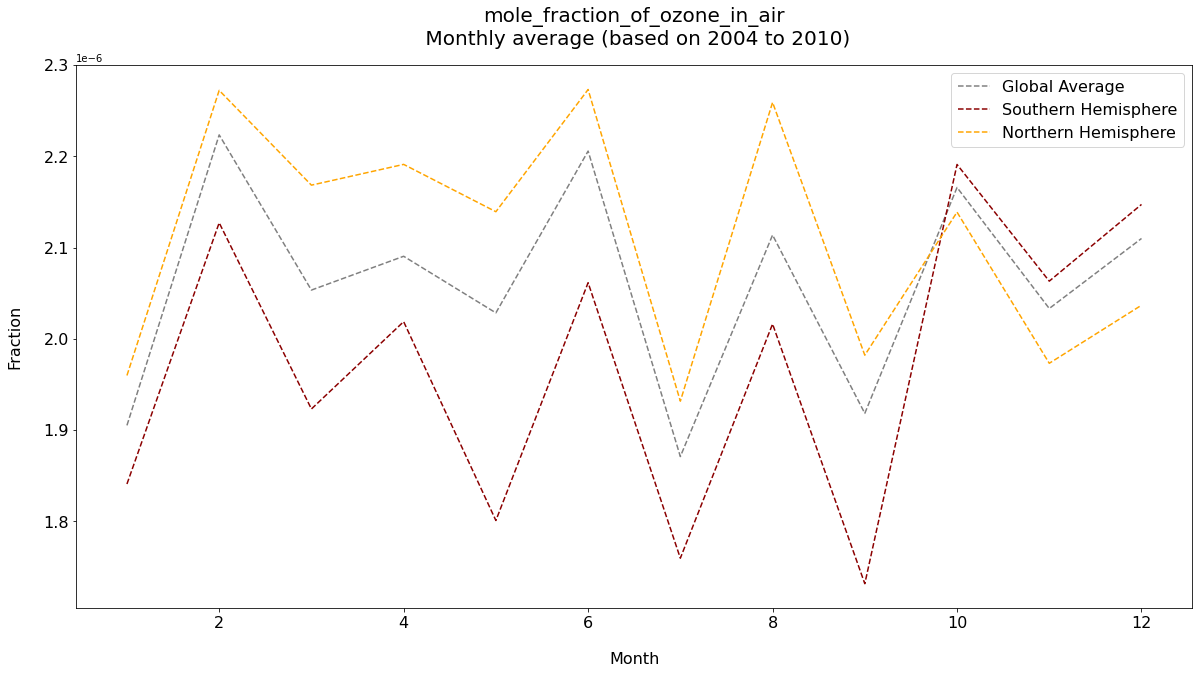

In [8]:
fig = plt.figure(figsize=(20,10))

(o3_l3_dict['global_extent']['o3_monthly_avg']).plot.line(
    linestyle='dashed',
    color='grey', 
    label='Global Average')

(o3_l3_dict['sh_extent']['o3_monthly_avg']).plot.line(
    linestyle='dashed',
    color='darkred', 
    label='Southern Hemisphere')

(o3_l3_dict['nh_extent']['o3_monthly_avg']).plot.line(
    linestyle='dashed',
    color='orange', 
    label='Northern Hemisphere')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(o3.standard_name + "\n Monthly average (based on 2004 to 2010)", fontsize=20, pad=20)
plt.ylabel('Fraction\n' , fontsize=16)
plt.xlabel('\nMonth', fontsize=16)
plt.legend(fontsize=16,loc=1)
plt.show()

## <a id='visualize_bar_plot'></a>Visualize global average annual time-series of ozone mixing ratio values from 2004 to 2010 as a bar plot

First, you can convert the xarray.DataArray with the annual mean climatology into a Pandas series using `.to_series`. This enables you to plot the data as a bar plot with the function `plot.bar()`.

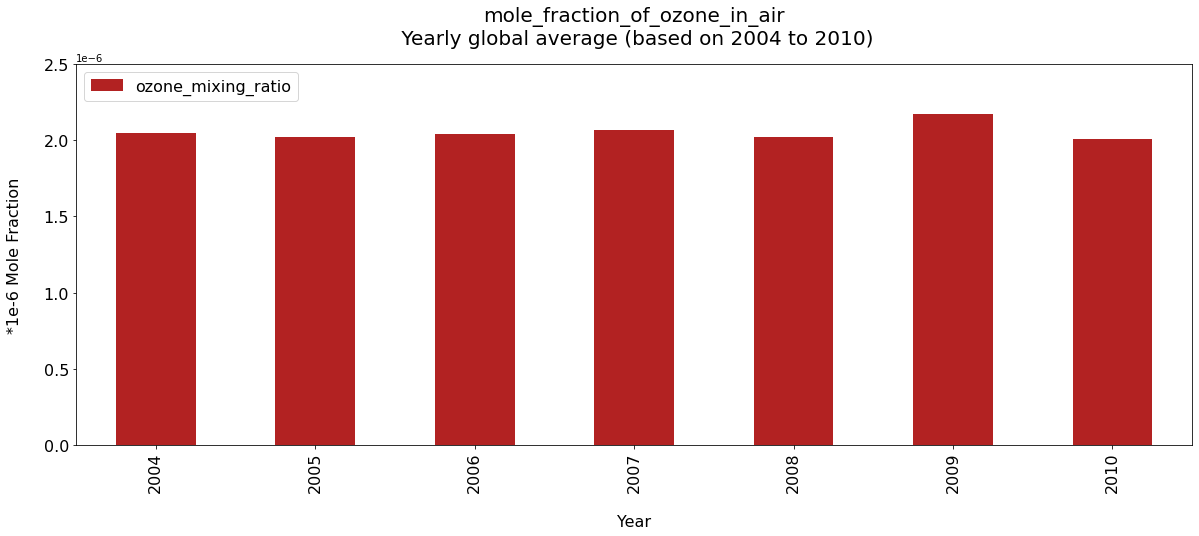

In [9]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,7))

o3_series = (o3_l3_dict['global_extent']['o3_yearly_avg']).to_series()

o3_series.plot.bar( 
    ax=ax, 
    color='firebrick')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(0, 2.5*1e-6)

plt.title(o3.standard_name + "\n Yearly global average (based on 2004 to 2010)", fontsize=20, pad=20)
plt.ylabel('*1e-6 Mole Fraction\n' , fontsize=16)
plt.xlabel('\nYear', fontsize=16)

plt.legend(fontsize=16,loc=2)
plt.show()

##### <hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a>.</p>